<center><h1> Agent-Based Model of Panic</h1> </center>

## Imports

In [2]:
import random
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from scipy import stats
import statistics
import math
import numpy as np
import seaborn as sns
import sklearn

In [3]:
plt.rc('figure', figsize=(10, 6))
plt.rcParams['font.size'] = '14'
sns.set_style("ticks", {'font.family': 'Times New Roman'})
sns.set_palette("Paired")

## Model Class

In [4]:
class Model():

    def __init__(self, num_of_agents, num_iterations, agent_groups): 
        
        self.num_of_agents = num_of_agents
        self.num_iterations = num_iterations
        self.agent_groups = agent_groups

        self.time = 0 #model time
        
        #creating lists
        self.num_infected_per_iteration = []
        self.num_infected_per_iteration_groups = []
        
        #create the agents
        self.agents = []
        
        for key in self.agent_groups.keys():
#             print(key)
            for i in range(round(self.agent_groups[key][3] * num_of_agents)):
                agent = Agent(self, key, key[0], key[1], key[2])
                agent.beta = self.agent_groups[key][0]
                agent.alpha = self.agent_groups[key][1]
                agent.gamma =  self.agent_groups[key][2]
#                 print(agent)
                self.agents.append(agent)
        
        self.infected_per_group = {}
        
        for g in self.agent_groups:
            self.infected_per_group[g] = []
        

    def get_num_infected(self):
        return len(([a for a in self.agents if a.state==1])) 

    def get_num_infected_iteration_groups(self, group_number):
        return len(([ a for a in self.agent_groups[group_number] if a.state==1 ]))
    
    def run(self):
        for t in range(self.num_iterations):
            for agent in self.agents:
                if t >=1:
                    agent.step()
           
            for g in self.agent_groups:
                group_agents = [a for a in self.agents if a.group == g]
                num_infected = sum([a.state for a in group_agents])
                self.infected_per_group[g].append(num_infected)
        
    
            self.num_infected_per_iteration.append(self.get_num_infected())
        
        
            self.data = pd.DataFrame(self.infected_per_group)
            self.data.reset_index(inplace = True, drop = False)
            
            self.dataset = pd.DataFrame(self.num_infected_per_iteration)
        
            
            self.result = pd.merge(self.data, self.dataset, left_index=True, right_index=True)
            self.result.rename(columns={self.result.columns[-1]: "num_infected" }, inplace = True)
        
    
            self.time += 1


## Agent Class

In [5]:
class Agent():
    
    def __init__(self, model, group, beta=0, alpha=0, gamma=0):
        
        #intialising parameters
        self.state = 0
        
        self.alpha = alpha
        self.gamma = gamma
        self.beta = beta 
        
        self.model = model
        
        self.group = group
        
        self.likelihood = 0

    def step(self):
        if self.state == 0:
            self.become_panicked()
            
        else:
            self.recover()
    
    
    def __repr__(self):
        return f"agent beta {self.beta}"
        
        
    def become_panicked(self):
        
        Agent_i = random.choice(self.model.agents)
        
        if Agent_i.state == 1:
            self.likelihood = self.alpha + self.beta
        else:
            self.likelihood = self.alpha
        
        r_v = random.random()
        if r_v < self.likelihood: 
            self.state = 1

#         for i, agent in enumerate(model.agents):
#             print('Agent {0}/{1}:'.format(i, model.num_of_agents)) 
#             print('Likelihood:{}, my state:{}'.format(self.likelihood, self.state))
            
       
    def recover(self): 
        r_v = random.random()
        if self.state == 1:
            if r_v < self.gamma:
                self.state = 0

## Running model

In [5]:
import scipy.special as sps  

In [8]:
shape, scale = 2., 0.5
s = np.random.gamma(shape, scale, 1000)

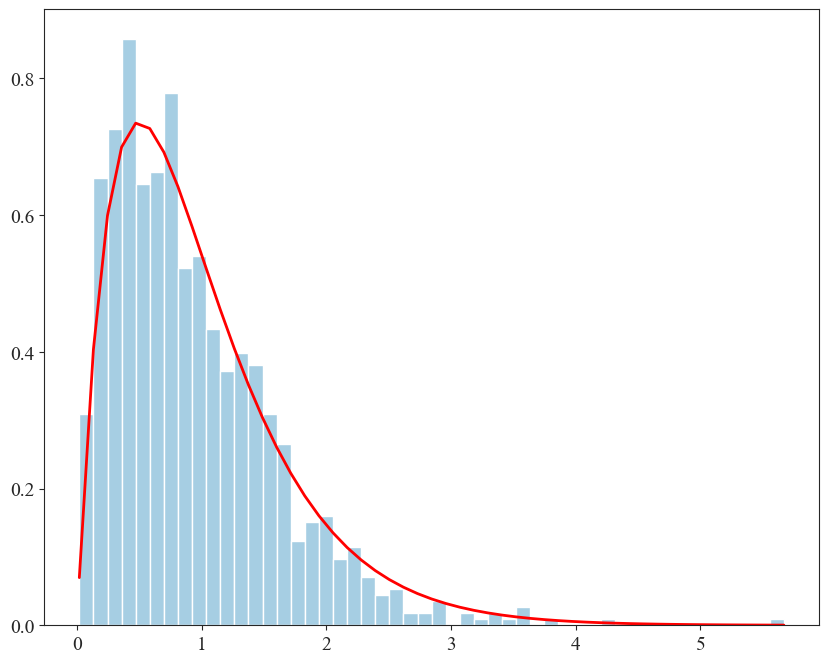

In [9]:
count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) / (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')  
plt.show()

In [10]:
s

array([1.59864943, 0.63114611, 1.45318623, 1.20911141, 1.20955929,
       0.65138431, 0.87058313, 2.51805695, 1.16327631, 1.20582404,
       0.26994035, 0.30737212, 0.29854754, 0.6283848 , 0.45822538,
       1.62033773, 0.92536069, 0.07767175, 0.52658587, 1.34820261,
       1.06545396, 0.71153623, 3.4431646 , 1.43473269, 1.3190542 ,
       1.15947173, 1.15086346, 1.18982232, 1.6752564 , 0.56557729,
       0.62295835, 1.18759771, 2.29389007, 0.20794969, 1.82470574,
       0.31381659, 1.44209994, 0.76009638, 1.09669138, 1.51607928,
       1.70461558, 0.46245207, 0.94517647, 2.66448842, 1.2319753 ,
       0.05574841, 0.15285792, 1.12647723, 1.02593654, 1.70895566,
       1.25797771, 0.46533152, 1.31672727, 0.57830721, 0.4018582 ,
       2.64849945, 0.43569473, 0.16474608, 1.14526724, 0.36814385,
       0.76342689, 0.5926516 , 0.13208509, 0.38173791, 0.28277895,
       0.85517313, 0.58743627, 0.38673971, 1.30785274, 0.55362587,
       1.46284037, 2.19128791, 0.51170404, 0.22854131, 1.70949

### Alpha, Beta, Gamma

In [101]:
Alpha = []
Beta = []
Gamma = []
Dataset = []
val = list()

In [105]:
num = [i/20 for i in range(21)]

for y in num:
    x = 0.4
    z = 0.4
    val.append([x, y, z])

In [99]:
# num = [i/200 for i in range(100)]

# for y in num:
#     x = 0.04
#     z = 0.04
#     if y < 0.1:
#         val.append([x, y, z])

In [107]:
t = len(val)

84

In [108]:
for i in range(t):
    agent_groups = {'Group1': [val[i][0], val[i][1], val[i][2], 1.0]}
    model = Model(num_of_agents=1000, num_iterations=100, agent_groups=agent_groups)
    model.run()

    Alpha.append(val[i][1])
    Beta.append(val[i][0])
    Gamma.append(val[i][2])
    for t, l in enumerate(model.num_infected_per_iteration):
            d = {'t': t,
                 'num_infected': l/model.num_of_agents,
                 'Alpha': val[i][1],
                 'Beta' : val[i][0],
                 'Gamma': val[i][2]}
            Dataset.append(d)

In [109]:
df = pd.DataFrame(Dataset)
df

,t,num_infected,Alpha,Beta,Gamma
0,0,0.000,0.0,0.2,0.2
1,1,0.000,0.0,0.2,0.2
2,2,0.000,0.0,0.2,0.2
3,3,0.000,0.0,0.2,0.2
4,4,0.000,0.0,0.2,0.2
...,...,...,...,...,...
8395,95,0.723,1.0,0.4,0.4
8396,96,0.724,1.0,0.4,0.4
8397,97,0.734,1.0,0.4,0.4
8398,98,0.708,1.0,0.4,0.4


## Plots

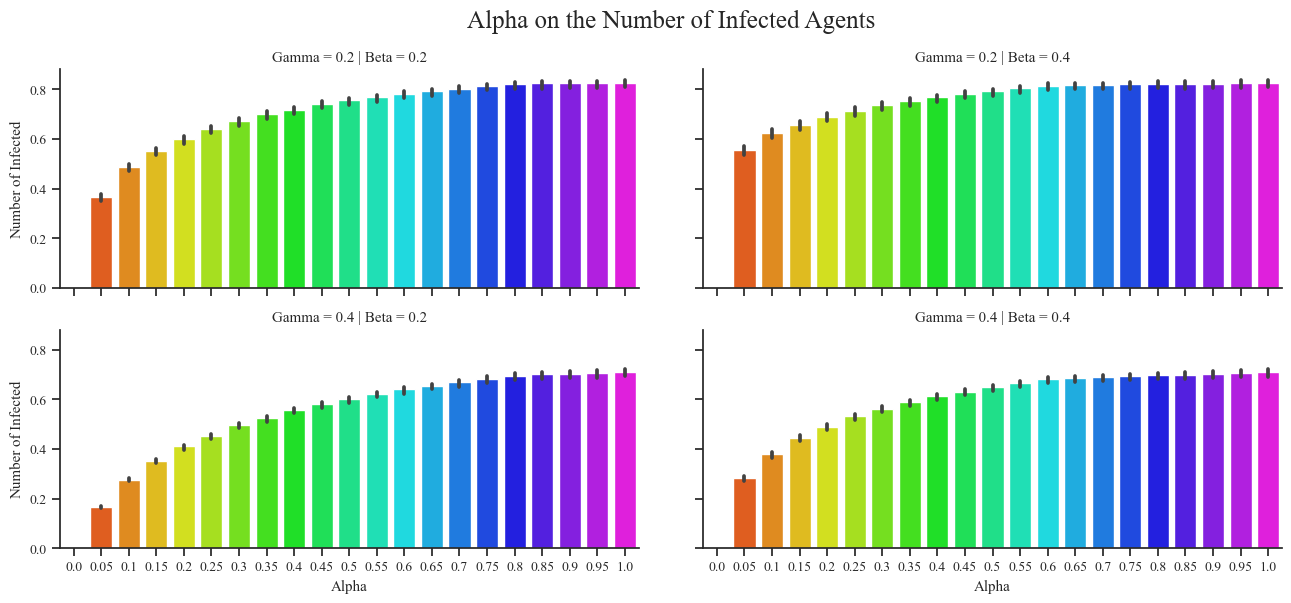

In [112]:
sns.set(font_scale = 0.9)
sns.set_style("ticks", {'font.family': 'Times New Roman'})
g = sns.FacetGrid(df, col="Beta", row='Gamma')
g.map_dataframe(sns.barplot, x = 'Alpha', y = 'num_infected', palette="gist_rainbow").add_legend()
g.set_axis_labels("Alpha", "Number of Infected")
g.fig.subplots_adjust(top=0.9, left = -0.5, right=1.5)
g.fig.suptitle('Alpha on the Number of Infected Agents', fontsize =18,  ha='center', y=1.0)
plt.savefig("Alpha_N1000_01",  bbox_inches="tight")

## Heatmaps

In [23]:
Alpha = []
Beta = []
Gamma = []
Dataset = []

In [24]:
num = [i/100 for i in range(10)]
val = list()

for x in num:
    for y in num:
        z = 0.1
        if x+y+z >0:
            val.append([x, y, z])

In [25]:
val

[[0.0, 0.0, 0.1],
 [0.0, 0.01, 0.1],
 [0.0, 0.02, 0.1],
 [0.0, 0.03, 0.1],
 [0.0, 0.04, 0.1],
 [0.0, 0.05, 0.1],
 [0.0, 0.06, 0.1],
 [0.0, 0.07, 0.1],
 [0.0, 0.08, 0.1],
 [0.0, 0.09, 0.1],
 [0.01, 0.0, 0.1],
 [0.01, 0.01, 0.1],
 [0.01, 0.02, 0.1],
 [0.01, 0.03, 0.1],
 [0.01, 0.04, 0.1],
 [0.01, 0.05, 0.1],
 [0.01, 0.06, 0.1],
 [0.01, 0.07, 0.1],
 [0.01, 0.08, 0.1],
 [0.01, 0.09, 0.1],
 [0.02, 0.0, 0.1],
 [0.02, 0.01, 0.1],
 [0.02, 0.02, 0.1],
 [0.02, 0.03, 0.1],
 [0.02, 0.04, 0.1],
 [0.02, 0.05, 0.1],
 [0.02, 0.06, 0.1],
 [0.02, 0.07, 0.1],
 [0.02, 0.08, 0.1],
 [0.02, 0.09, 0.1],
 [0.03, 0.0, 0.1],
 [0.03, 0.01, 0.1],
 [0.03, 0.02, 0.1],
 [0.03, 0.03, 0.1],
 [0.03, 0.04, 0.1],
 [0.03, 0.05, 0.1],
 [0.03, 0.06, 0.1],
 [0.03, 0.07, 0.1],
 [0.03, 0.08, 0.1],
 [0.03, 0.09, 0.1],
 [0.04, 0.0, 0.1],
 [0.04, 0.01, 0.1],
 [0.04, 0.02, 0.1],
 [0.04, 0.03, 0.1],
 [0.04, 0.04, 0.1],
 [0.04, 0.05, 0.1],
 [0.04, 0.06, 0.1],
 [0.04, 0.07, 0.1],
 [0.04, 0.08, 0.1],
 [0.04, 0.09, 0.1],
 [0.05, 0.0, 0.

In [26]:
t = len(val)
t

100

In [27]:
for i in range(t):
    agent_groups = {'Group1': [val[i][0], val[i][1], val[i][2], 1.0]}
    model = Model(num_of_agents=1000, num_iterations=100, agent_groups=agent_groups)
    model.run()

    Alpha.append(val[i][1])
    Beta.append(val[i][0])
    Gamma.append(val[i][2])
    for t, l in enumerate(model.num_infected_per_iteration):
            d = {'t': t,
                 'num_infected': l,
                 'Alpha': val[i][1],
                 'Beta' : val[i][0],
                 'Gamma': val[i][2],
                'scaled_val': l/model.num_of_agents}
            Dataset.append(d)

In [28]:
df = pd.DataFrame(Dataset)

In [29]:
comp_1 = df[["Alpha", "Beta", "scaled_val"]]

In [30]:
c = comp_1.pivot_table(index='Alpha', columns='Beta', values='scaled_val', aggfunc='mean')

In [31]:
data = c.drop([0], axis=0)
data

Beta,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
Alpha,,,,,,,,,,
0.01,0.07861,0.09457,0.09337,0.10483,0.11988,0.13426,0.14444,0.16751,0.17449,0.20155
0.02,0.15373,0.17038,0.16954,0.18400,0.20246,0.21423,0.23128,0.25965,0.26803,0.28462
0.03,0.21124,0.22200,0.23965,0.24745,0.27803,0.28643,0.31233,0.33421,0.34387,0.36119
0.04,0.27198,0.27797,0.29848,0.32486,0.32150,0.35006,0.34980,0.37824,0.39064,0.40587
0.05,0.31488,0.32384,0.33140,0.34464,0.38518,0.39016,0.39458,0.41176,0.42982,0.45974
0.06,0.34352,0.37023,0.38879,0.40825,0.41827,0.42399,0.43548,0.45153,0.47437,0.48273
0.07,0.39340,0.41860,0.41302,0.43113,0.43886,0.45787,0.47804,0.49112,0.50780,0.51593
0.08,0.42749,0.43643,0.44737,0.46924,0.48935,0.48804,0.50566,0.50863,0.52313,0.53790
0.09,0.45173,0.46932,0.46992,0.49470,0.50538,0.51195,0.52452,0.54354,0.55213,0.55271


In [ ]:
# cc=c.iloc[0:10,0:30]
# cc

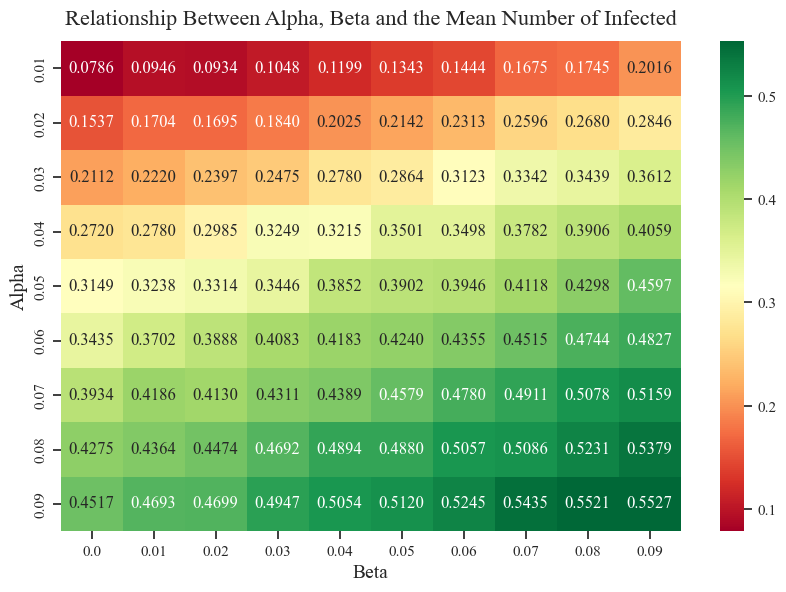

In [32]:
sns.set(font_scale = 1.0)
sns.set_style("ticks", {'font.family': 'Times New Roman'})
fig, ax = plt.subplots(figsize=(10, 10))
fig = sns.heatmap(data, cmap = 'RdYlGn', annot=True, fmt=".4f")
plt.subplots_adjust(top=0.6)
ax.set_xlabel('Beta', fontsize = 14);
ax.set_ylabel('Alpha', fontsize = 14);
ax.set_title('Relationship Between Alpha, Beta and the Mean Number of Infected', fontsize = 16, pad=12);
plt.savefig("Comp-gamma-01.png", bbox_inches="tight")